In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from aerosandbox import *

import matplotlib.pyplot as plt
from Geometry import Point

plt.style.use('ggplot')

import pandas as pd
import numpy as np

from tqdm import tqdm as tqdm

from fluids.atmosphere import ATMOSPHERE_1976

## Operation point

In [30]:
ALTITUDE = 11000
MACH     = 0.75
CL       = 0.45

In [31]:
atmosphere = ATMOSPHERE_1976(ALTITUDE)

speed_sound = atmosphere.sonic_velocity(atmosphere.T)

## Geometry definitions

### Main wing definition

Define the wing parameters with the axes defined towards the right-side wing.

In [32]:
WING_AIRFOIL = 'naca4412'

WING_CHORDS       = [5.6, 3.6, 1.26]
WING_LE_LOCATIONS = [Point([0.0,   0.0,  0.0]), 
                     Point([2.34,  4.6,  0.2]), 
                     Point([5.5,  14.04, 0.61])]

### Winglet definition

In [33]:
WINGLET_AIRFOIL = 'naca0012'

WINGLET_TAPER_RATIO = 0.32

WINGLET_ANGLES = dict(sweep = 38, 
                      cant  = 0) # deg

# Convert to radians
WINGLET_ANGLES = dict((key, np.deg2rad(angle)) for key, angle in WINGLET_ANGLES.items())

wing_span = WING_LE_LOCATIONS[-1].y
WINGLET_LENGTH     = 0.05 * wing_span # meters
WINGLET_CHORD_ROOT = 0.65 * WING_CHORDS[-1] # m

# These are not converted to radians because AeroSandbox takes them as degrees
WINGLET_TWIST = dict(root = 0,
                     tip  = 0)

In [34]:
N_cant = 10

results = []

for cant in tqdm(np.linspace(0, 90, N_cant)):
    
    WINGLET_ANGLES['cant'] = np.deg2rad(cant)
    
    USE_WINGLET = True
    
    %run 0-Geometry.ipynb
    %run 1-Solver.ipynb

    aero_problem = run_aero_problem_cl(0.45)

    results.append((cant, aero_problem.op_point.alpha, aero_problem.CDi))

100%|██████████| 10/10 [00:57<00:00,  5.71s/it]


In [35]:
results_df = pd.DataFrame(results, columns = ['cant', 'alpha', 'CDi'])

results_df = results_df.set_index('cant')

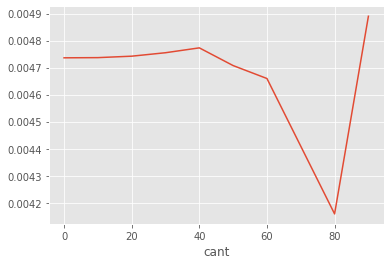

In [36]:
results_df.query('CDi>0')['CDi'].plot()

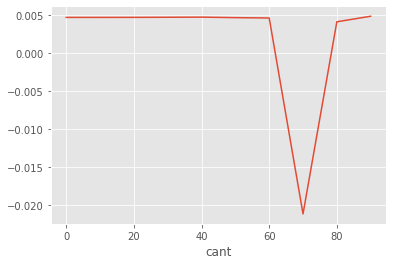

In [37]:
results_df['CDi'].plot()